In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', as_frame=False)

In [4]:
X,y = mnist.data,mnist.target

In [5]:
X.shape

(70000, 784)

In [6]:
import matplotlib.pyplot as plt 
def plot_image(image_data,dim=(28,28)):
    image = image_data.reshape(dim)
    plt.imshow(image,cmap='binary')
    plt.axis('off')
    plt.show()

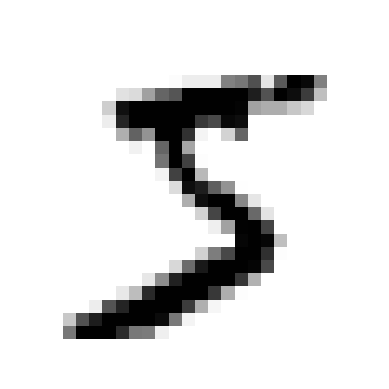

In [7]:
some_digit = X[0]
plot_image(some_digit)


In [8]:
y[0]

'5'

In [9]:
X_train , X_test , y_train,y_test = X[:60000] , X[60000:] , y[:60000],y[60000:]

In [10]:
y_train_5 = (y_train=='5')

In [11]:

y_test_5 = (y_test=='5')

In [12]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [13]:
sgd_clf.predict([some_digit])

array([ True])

In [14]:
from sklearn.model_selection import cross_val_score 
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [15]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,y_train_5)

DummyClassifier()

In [16]:
print(any(dummy_clf.predict(X_train)))

False


In [17]:
cross_val_score(dummy_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [18]:
def customKFold(X_train,y_train,model):
    from sklearn.model_selection import StratifiedKFold
    from sklearn.base import clone

    skfolds = StratifiedKFold(n_splits=3)

    for train_index,test_index in skfolds.split(X_train,y_train_5):
        clone_clf = clone(model)
        X_train_folds = X_train[train_index]
        y_train_folds = y_train[train_index]
        X_test_fold = X_train[test_index]
        y_test_fold = y_train[test_index]
        
        
        clone_clf.fit(X_train_folds,y_train_folds)
        y_pred = clone_clf.predict(X_test_fold)
        n_correct = sum(y_pred==y_test_fold)
        print(n_correct / len(y_pred))
    
    


In [19]:
from sklearn.model_selection  import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5,y_train_pred)

In [21]:
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [22]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [23]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [24]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343847

In [25]:
from sklearn.metrics import precision_recall_curve
precision_recall_curve(y_train_5,y_train_pred)

(array([0.09035   , 0.83708798, 1.        ]),
 array([1.        , 0.65117137, 0.        ]),
 array([False,  True]))

In [26]:
y_scores = sgd_clf.decision_function([some_digit])


In [27]:
y_scores

array([2164.22030239])

In [28]:

threshold = 0 

In [29]:
y_some_digit_pred = (y_scores>threshold)

In [30]:
threshold =3000

In [31]:
y_some_digit_pred = (y_scores>threshold)

In [32]:
y_some_digit_pred

array([False])

In [33]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=2,method='decision_function')

In [34]:
from sklearn.metrics import precision_recall_curve

precisions , recalls, thresholds = precision_recall_curve(y_train_5,y_scores)


In [35]:
def precision_recall_curve_plot(thresholds,precisions,recalls,threshold):
    import matplotlib.pyplot as plt 
    
    plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

    # extra code – this section just beautifies and saves Figure 3–5
    idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
    plt.plot(thresholds[idx], precisions[idx], "bo")
    plt.plot(thresholds[idx], recalls[idx], "go")
    plt.axis([-50000, 50000, 0, 1])
    plt.grid()
    plt.xlabel("Threshold")
    plt.legend(loc="center right")
    # save_fig("precision_recall_vs_threshold_plot")

    plt.show()

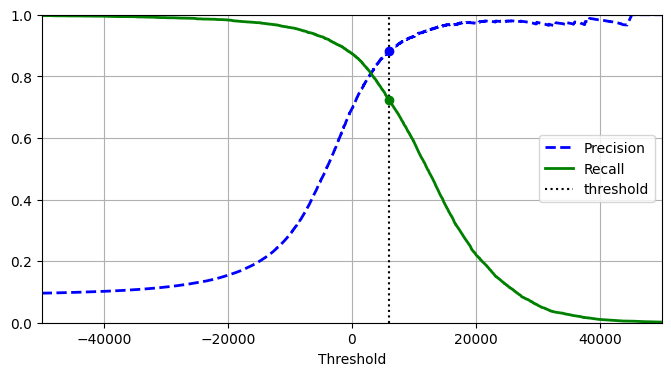

In [36]:
precision_recall_curve_plot(thresholds,precisions,recalls,6000)

In [37]:
def precision_recall_plot(precisions,recalls,thresholds,threshold):
    import matplotlib.patches as patches  # extra code – for the curved arrow
    idx = (thresholds >= threshold).argmax()  # first index ≥ threshold

    plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

    plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

    # extra code – just beautifies and saves Figure 3–6
    plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
    plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
    plt.plot([recalls[idx]], [precisions[idx]], "ko",
            label="Point at threshold 3,000")
    plt.gca().add_patch(patches.FancyArrowPatch(
        (0.79, 0.60), (0.61, 0.78),
        connectionstyle="arc3,rad=.2",
        arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
        color="#444444"))
    plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])
    plt.grid()
    plt.legend(loc="lower left")
    # save_fig("precision_vs_recall_plot")

    plt.show()
    

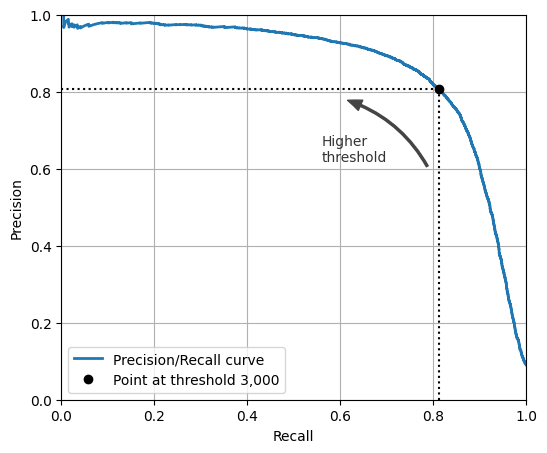

In [38]:
precision_recall_plot(precisions,recalls,thresholds,threshold)

In [39]:
idx_for_90_precision = (precisions>=0.90).argmax()

In [40]:
threshold_for_90_precision = thresholds[idx_for_90_precision]

In [41]:
threshold_for_90_precision

7277.960571395063

In [42]:
y_train_pred_90 = (y_scores>=threshold_for_90_precision)

In [43]:
precision_score(y_train_5,y_train_pred_90)

0.9000485201358563

In [44]:
recall_at_90_precision = recall_score(y_train_5,y_train_pred_90)

In [45]:

recall_at_90_precision

0.6843755764619074

In [46]:
from sklearn.metrics import roc_curve 


In [47]:
# fpr , tpr , threshold = roc_curve(y_train_5,y_scores)

In [48]:
def plot_roc_curve(threshold_for_90_precision):
    import matplotlib.patches as patches
    fpr , tpr , thresholds = roc_curve(y_train_5,y_scores)
    idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
    tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

    plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
    plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
    plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
    plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

    # extra code – just beautifies and saves Figure 3–7
    plt.gca().add_patch(patches.FancyArrowPatch(
        (0.20, 0.89), (0.07, 0.70),
        connectionstyle="arc3,rad=.4",
        arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
        color="#444444"))
    plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
    plt.xlabel('False Positive Rate (Fall-Out)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid()
    plt.axis([0, 1, 0, 1])
    plt.legend(loc="lower right", fontsize=13)
    # save_fig("roc_curve_plot")

    plt.show()

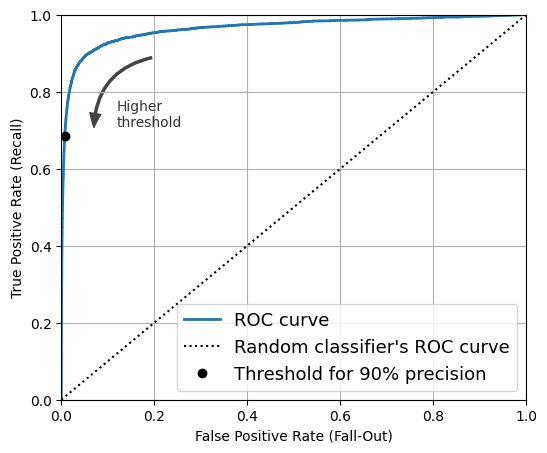

In [49]:
plot_roc_curve(threshold_for_90_precision)

In [50]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores)

0.9650460216920477

In [52]:
from sklearn.ensemble  import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [53]:
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method='predict_proba')
 

In [54]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [55]:
y_scores_forest = y_probas_forest[:,1]

In [56]:
precisions_forest,recalls_forest,thresholds_forest = precision_recall_curve(y_train_5,y_scores_forest)

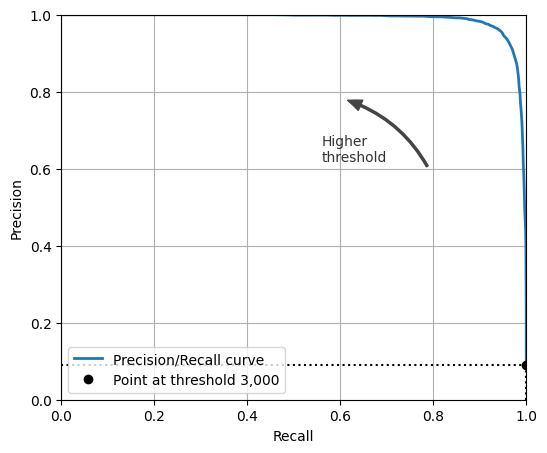

In [58]:
precision_recall_plot(precisions=precisions_forest,recalls=recalls_forest,thresholds=thresholds_forest,threshold=3000)

In [ ]:
def plot_compare_pr_curves(recalls_clf_one,precisions_clf_one,recalls_clf_two,precisions_clf_two,lable_one,label_two):
    plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

    plt.plot(recalls_clf_one, precisions_clf_one, "b-", linewidth=2,
            label=lable_one)
    plt.plot(recalls_clf_two, precisions_clf_two, "--", linewidth=2, label=label_two)

    # extra code – just beautifies and saves Figure 3–8
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])
    plt.grid()
    plt.legend(loc="lower left")

    plt.show()

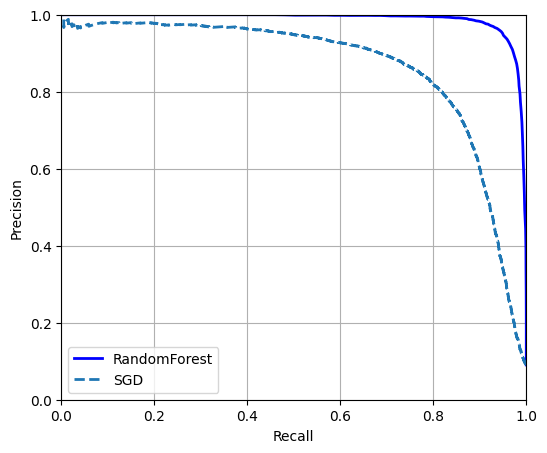

In [60]:
plot_compare_pr_curves(recalls_forest,precisions_forest,recalls,precisions,'RandomForest','SGD')

In [61]:
from sklearn.svm import SVC

In [62]:
svm_clf =SVC(random_state=42)

In [63]:
svm_clf.fit(X_train[:2000],y_train[:2000])

SVC(random_state=42)

In [64]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [65]:
some_digit_scores = svm_clf.decision_function([some_digit])

In [67]:
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [69]:
class_id = some_digit_scores.argmax()

In [70]:
class_id

5

In [71]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [73]:
svm_clf.classes_[class_id]

'5'

In [74]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))

In [75]:
ovr_clf.fit(X_train[:2000],y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [76]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [77]:
len(ovr_clf.estimators_)

10

In [78]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [79]:
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [80]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [81]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype('float64'))

In [83]:
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring='accuracy')


array([0.8983, 0.891 , 0.9018])

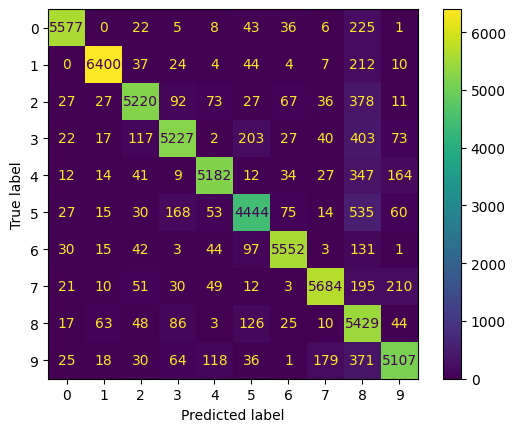

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.show()

In [85]:
sample_weight = (y_train_pred!=y_train)

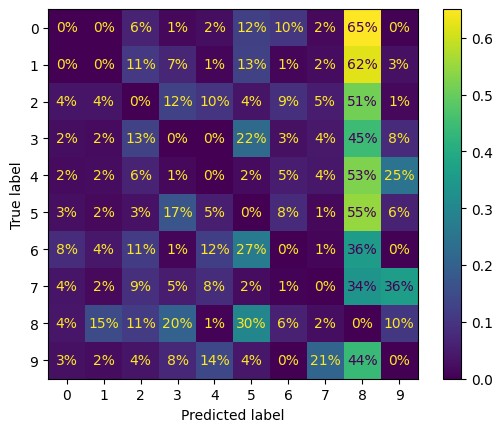

In [86]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,sample_weight=sample_weight,normalize='true',values_format='.0%')

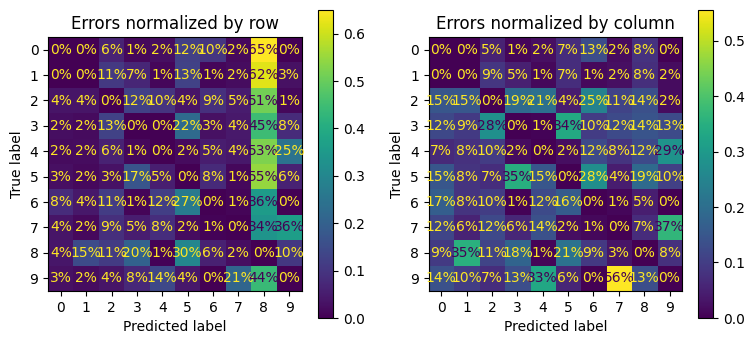

In [88]:
# extra code – this cell generates and saves Figure 3–10
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
# save_fig("confusion_matrix_plot_2")
plt.show()
plt.rc('font', size=14)  # make fonts great again

In [89]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

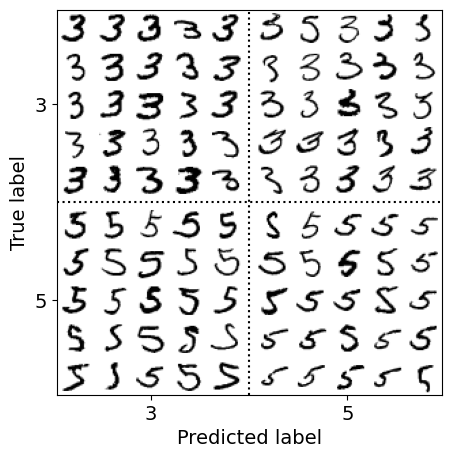

In [91]:
# extra code – this cell generates and saves Figure 3–11
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
# save_fig("error_analysis_digits_plot")
plt.show()

In [92]:
import numpy as np

In [93]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [94]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [95]:
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)

In [96]:
f1_score(y_multilabel,y_train_knn_pred,average='macro')

0.9764102655606048

In [97]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [98]:
chain_clf.predict([some_digit])

array([[0., 1.]])

In [99]:
np.random.seed(42)  # to make this code example reproducible
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

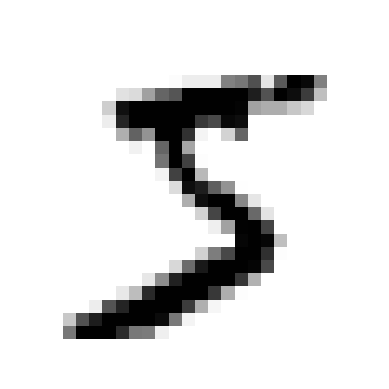

In [102]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
# save_fig("some_digit_plot")  # extra code
plt.show()

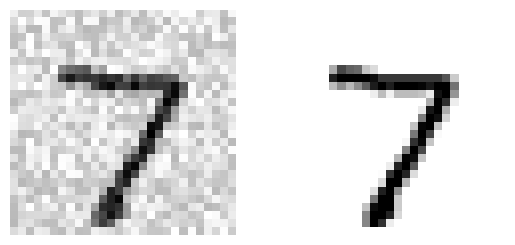

In [103]:
# extra code – this cell generates and saves Figure 3–12
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
# save_fig("noisy_digit_example_plot")
plt.show()

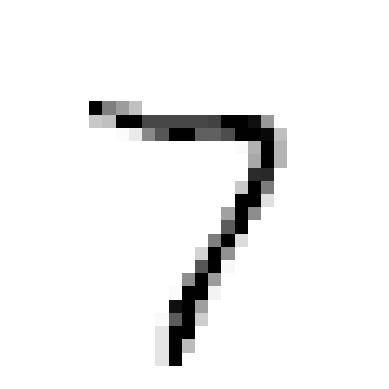

In [104]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
# save_fig("cleaned_digit_example_plot")  # extra code – saves Figure 3–13
plt.show()